In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#define directory 
directory = "C:/Users/annaj/Desktop/"

#load in csv file 
df = pd.read_csv("LabMeeting_8_29.csv")
df


,Mouse,Age,Record,ROI,Max Amp Stim 1,Max Amp Stim 2,PPR,IPI,SNR,Barrel,Layer,Stim Layer,NPixel
0,7/26/2022,13.857143,03_01_01,1,0.001240,0.000683,0.550762,20,3.48335,1,4,4,1.0
1,7/26/2022,13.857143,03_01_01,2,0.001375,0.000704,0.512007,20,6.49998,1,4,4,1.0
2,7/26/2022,13.857143,03_01_01,3,0.001445,0.000824,0.570476,20,7.30323,Edge,4,4,5.0
3,7/26/2022,13.857143,03_01_01,4,0.001114,0.000731,0.656075,20,4.53138,1,4,4,2.0
4,7/26/2022,13.857143,03_01_01,5,0.001375,0.000819,0.595926,20,4.93487,Edge,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,6/23/2023,10.857143,05_03_07,98,0.008289,0.002514,0.303238,10,16.81800,1,4,5,1.0
5125,6/23/2023,10.857143,05_03_07,99,0.006082,0.004297,0.706546,10,5.24362,1,2_3,5,3.0
5126,6/23/2023,10.857143,05_03_07,100,0.008843,0.003274,0.370195,10,20.74820,1,4,5,2.0
5127,6/23/2023,10.857143,05_03_07,101,0.009531,0.006653,0.698068,10,14.05520,1,2_3,5,2.0


In [3]:
#remove data based on parameters 
snr_cutoff = 5
amp_cutoff = 0.001

#delete all rows with column 'Max Amp' is less than amp_cutoff
indexAmp = df[(df['Max Amp Stim 1'] < amp_cutoff)].index
df.drop(indexAmp, inplace=True)

#delete all rows with column 'SNR' is less than snr_cutoff
indexSNR = df[(df['SNR'] < snr_cutoff)].index
df.drop(indexSNR, inplace=True)

#keep all rows with "nPixels" greater than 1
indexnPixels = df[(df['NPixel'] <= 1)].index
df.drop(indexnPixels, inplace=True)

#remove all poor visual id results
#indexVID = df[(df['VisID'] = 0)].index
#df.drop(indexVID, inplace=True)

df


,Mouse,Age,Record,ROI,Max Amp Stim 1,Max Amp Stim 2,PPR,IPI,SNR,Barrel,Layer,Stim Layer,NPixel
2,7/26/2022,13.857143,03_01_01,3,0.001445,0.000824,0.570476,20,7.30323,Edge,4,4,5.0
12,7/26/2022,13.857143,03_01_01,13,0.001573,0.000566,0.359643,20,5.35531,1,4,4,4.0
14,7/26/2022,13.857143,03_01_01,15,0.001614,0.000737,0.456941,20,6.81119,Edge,4,4,2.0
21,7/26/2022,13.857143,03_01_01,22,0.001543,0.001779,1.152546,20,5.39167,0,4,4,2.0
24,7/26/2022,13.857143,03_01_01,25,0.001241,0.001189,0.957729,20,5.83484,1,5,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,6/23/2023,10.857143,05_03_07,90,0.007031,0.004739,0.673974,10,12.83980,Edge,2_3,5,4.0
5125,6/23/2023,10.857143,05_03_07,99,0.006082,0.004297,0.706546,10,5.24362,1,2_3,5,3.0
5126,6/23/2023,10.857143,05_03_07,100,0.008843,0.003274,0.370195,10,20.74820,1,4,5,2.0
5127,6/23/2023,10.857143,05_03_07,101,0.009531,0.006653,0.698068,10,14.05520,1,2_3,5,2.0


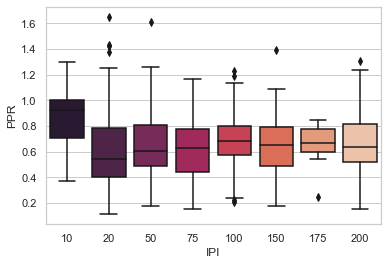

In [4]:
#INTERPULSE INTERVAL SELECTION 
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x="IPI", y="PPR", palette = "rocket")
plt.show()

In [8]:
#recreate data frame with just standard IPI 20, 50, 100
indexIPI = df[ (df['IPI'] == 10) ]
indexIPI = df[ (df['IPI'] == 75) ]
indexIPI = df[ (df['IPI'] > 100) ]
df

standardIPIdf = df.groupby(by="IPI").mean("PPR")
standardIPIdf

,Age,ROI,Max Amp Stim 1,Max Amp Stim 2,PPR,SNR,NPixel
IPI,,,,,,,
20,12.810540,73.560976,0.003453,0.002077,0.600946,9.484851,3.009146
50,12.539011,66.888462,0.003901,0.002523,0.642741,8.814604,2.923077
100,12.893154,73.878116,0.003685,0.002514,0.687263,9.096607,2.864266


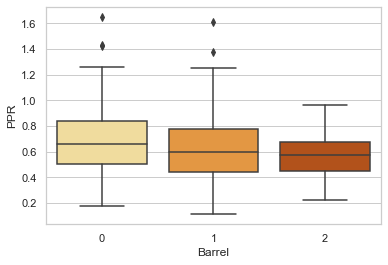

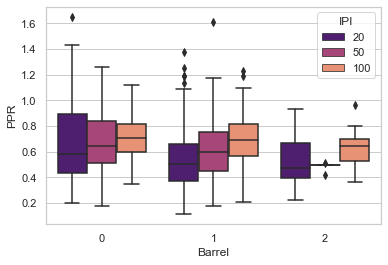

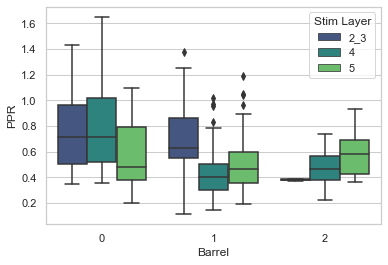

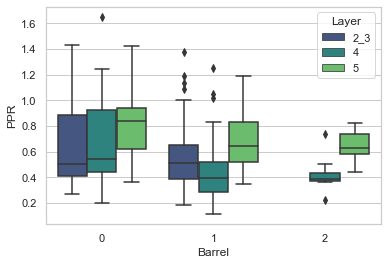

In [5]:
#organize by barrel 
indexBarrel = df[ (df['Barrel'] == 'Edge') ].index
df.drop(indexBarrel, inplace=True)

sns.boxplot(data=df, x="Barrel", y="PPR",order= ["0","1","2"], palette='YlOrBr')
plt.show()

sns.boxplot(data=df, x="Barrel", y="PPR", order= ["0","1","2"], hue = "IPI", palette="magma")
plt.show()

indexIPI = df[ (df['IPI'] == 100) ].index
df.drop(indexIPI , inplace=True)
indexIPI = df[ (df['IPI'] == 50) ].index
df.drop(indexIPI , inplace=True)

sns.boxplot(data=df, x="Barrel", y="PPR", order= ["0","1","2"], hue = "Stim Layer", palette="viridis",hue_order= ["2_3","4","5"])
plt.show()

sns.boxplot(data=df, x="Barrel", y="PPR", order= ["0","1","2"], hue = "Layer", palette="viridis",hue_order= ["2_3","4","5"])
plt.show()

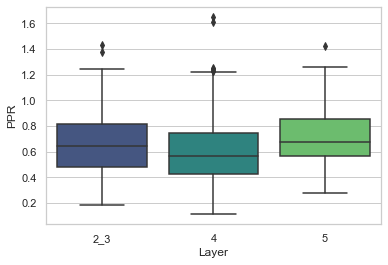

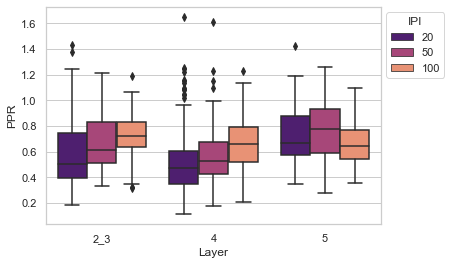

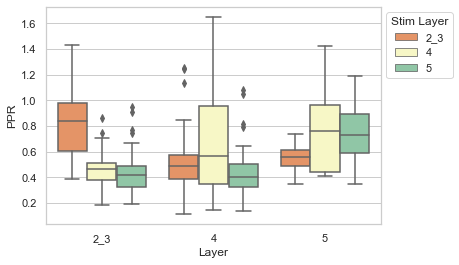

In [25]:
#organize by response layer
indexLayer = df[ (df['Layer'] == 'Edge') ].index
df.drop(indexLayer, inplace=True)

sns.boxplot(data=df, x="Layer", y="PPR",order= ["2_3","4","5"], palette="viridis")
plt.show()

ly = sns.boxplot(data=df, x="Layer", y="PPR", order= ["2_3","4","5"], hue = "IPI", palette="magma")
sns.move_legend(ly, "upper left", bbox_to_anchor=(1, 1))
plt.show()

indexIPI = df[ (df['IPI'] == 100) ].index
df.drop(indexIPI , inplace=True)
indexIPI = df[ (df['IPI'] == 50) ].index
df.drop(indexIPI , inplace=True)

sly = sns.boxplot(data=df, x="Layer", y="PPR", order= ["2_3","4","5"], hue = "Stim Layer", palette="Spectral",hue_order= ["2_3","4","5"])
sns.move_legend(sly, "upper left", bbox_to_anchor=(1, 1))
plt.show()

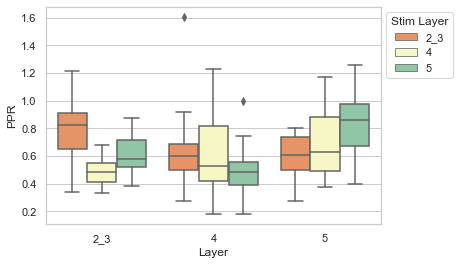

In [10]:
indexLayer = df[ (df['Layer'] == 'Edge') ].index
df.drop(indexLayer, inplace=True)

indexIPI = df[ (df['IPI'] == 20) ].index
df.drop(indexIPI , inplace=True)
indexIPI = df[ (df['IPI'] == 100) ].index
df.drop(indexIPI , inplace=True)

sly = sns.boxplot(data=df, x="Layer", y="PPR", order= ["2_3","4","5"], hue = "Stim Layer", palette="Spectral",hue_order= ["2_3","4","5"])
sns.move_legend(sly, "upper left", bbox_to_anchor=(1, 1))
plt.show()